In [6]:
import locmofitpy2
import pandas as pd

data = pd.read_csv("data/simulated_data_ring.csv")
locs = data.values[:, 0:3]
loc_precs = data.values[:, 3:]

In [7]:
# %%timeit
res = locmofitpy2.run_locmofit(
    "Ring",
    locs,
    loc_precs,
    init_params={"r": 10},
    freeze=(),
    max_iter=200,
    tol=1e-6,
)

In [8]:
print(res["losses"][-1], res["losses"].shape[0])

391.1737 200


In [9]:
res["parameters"]

{'phi': -0.9685084223747253,
 'r': 50.108070373535156,
 'theta': -0.39994147419929504,
 'x': 0.03510444611310959,
 'y': 2.2102785110473633,
 'z': -0.5908458232879639}

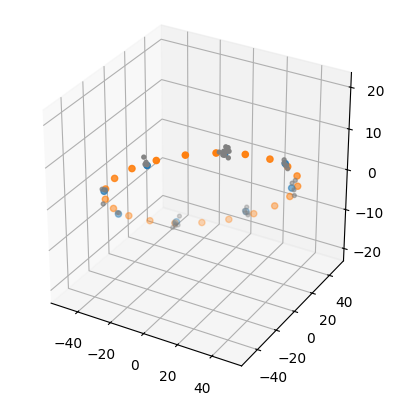

In [10]:
import numpy as np
import matplotlib.pyplot as plt

ground_truth = pd.read_csv("data/ground_truth_ring.csv")

positions = np.array(res["model_points"])  # converts JAX array -> NumPy array on host

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.scatter(data["x"], data["y"], data["z"], c="gray", s=8)  # type: ignore[arg-type]
ax.scatter(ground_truth["x"], ground_truth["y"], ground_truth["z"])  # type: ignore[arg-type]
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])  # type: ignore[arg-type]

plt.show()
